How many things pass spearman? We saw plots for MAD.

#Index

* <a href="#Replication-Type-Histograms">Spearman histograms by replication type</a>
* <a href="#Starting-Amount-Histograms">Spearman histograms by nucleic acid starting amount</a>
* <a href="#Experiments-Analyzed">List of experiments</a>

In [1]:
import pandas
import collections
import sys
import os
import numpy
import time
from matplotlib import pyplot
pyplot.style.use('ggplot')

ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT not in sys.path:
    sys.path.append(ROOT)

import save_rnaseq_madqc

pandas.options.display.max_rows = 999

In [2]:
%matplotlib inline

#Load Experiment Cache

(Imports metadata for grouping)

In [3]:
query_url = 'search/?type=experiment&assay_term_name=RNA-seq'
cache_name = 'rnaseq-experiments.shelf'
cache = save_rnaseq_madqc.caching_encoded_experiment_loader(query_url, cache_name)

Reading 140 of 1408 records in 0.007307445001060842 seconds
Reading 280 of 1408 records in 0.005713704998925095 seconds
Reading 420 of 1408 records in 0.0050558420007291716 seconds
Reading 560 of 1408 records in 0.02390120299969567 seconds
Reading 700 of 1408 records in 0.011298407000140287 seconds
Reading 840 of 1408 records in 0.018772364001051756 seconds
Reading 980 of 1408 records in 0.009026149000419537 seconds
Reading 1120 of 1408 records in 0.04060856199794216 seconds
Reading 1260 of 1408 records in 0.047054031001607655 seconds
Reading 1400 of 1408 records in 0.030177265998645453 seconds
Read 1408 records in 0.19891497400021763 seconds


Prepare experiment dataframe

In [4]:
experiment_df = save_rnaseq_madqc.make_experiment_df(cache)
experiment_df.set_index('experiment', inplace=True)

#Group by replication type

Slice experiment dataframe by replication type (from metadata cache)

In [5]:
replication_scores = {}
for experiment_id, row in experiment_df.iterrows():
    replication_type = cache[experiment_id]['replication_type']
    score =  row.Spearman
    replication_scores.setdefault(replication_type, []).append(score)

In [6]:
for score in replication_scores:
    replication_scores[score] = pandas.Series(replication_scores[score])

In [7]:
def plot_by_replication(replication_scores):
    for score in replication_scores:
        if len(replication_scores[score]) > 2:
            current_scores = replication_scores[score]
            passed = len(current_scores[current_scores > 0.9])
            f = replication_scores[score].plot(kind='hist', xlim=[0, 1])
            f.set_title("{}: {} passed of {} experiments ({:0.1%})".format(
                    score, passed, len(current_scores), passed/len(current_scores)))
            f.set_xlabel('Spearman')
            f.set_ylabel('Number of Samples')
            f.axvline(0.9)
            pyplot.show(f)
        else:
            print("Skipping {} only {} samples".format(score, len(replication_scores[score])))
 

#Replication Type Histograms

<a href="#Index">Top</a> <a href="#Starting-Amount-Histograms">next</a>

(Line is x = 0.9)  

Skipping anisogenic, age-matched only 1 samples


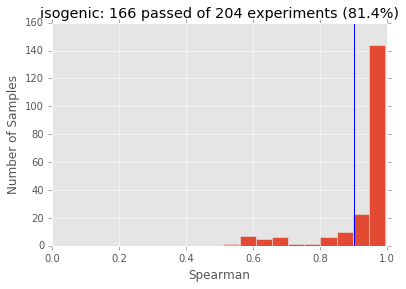

Skipping anisogenic, sex-matched and age-matched only 2 samples


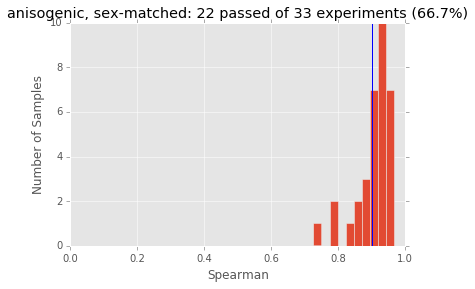

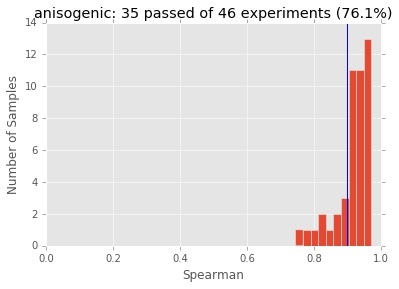

In [8]:
plot_by_replication(replication_scores)

In [9]:
starting_amount_scores = {}
for experiment_id, row in experiment_df.iterrows():
    library = cache[experiment_id]['replicates'][0]['library']
    starting_amount = library.get('nucleic_acid_starting_quantity', 'Unknown')
    starting_units = library.get('nucleic_acid_starting_quantity_units', '')
    
    if starting_units in ('cells', 'cell-equivalent'):
        starting = 'pooled cells'
    elif starting_units == 'ng' and float(starting_amount) >= 10:
        starting = '>= 10 ng'
    elif starting_amount == 'Unknown':
        starting = 'Unknown'
    else:
        starting = '{} {}'.format(starting_amount, starting_units)
    
    score =  row.Spearman
    starting_amount_scores.setdefault(starting, []).append(score)    

for score in starting_amount_scores:
    starting_amount_scores[score] = pandas.Series(starting_amount_scores[score])

In [10]:
def plot_by_starting_amount(starting_amount_scores):
    for score in starting_amount_scores:
        if len(starting_amount_scores[score]) > 2:
            current_scores = starting_amount_scores[score]
            passed = len(current_scores[current_scores > 0.9])
            f = starting_amount_scores[score].plot(kind='hist', xlim=[0, 1])
            f.set_title("{}: {} passed of {} experiments ({:.1%})".format(
                    score, passed, len(current_scores), passed/len(current_scores)))
            f.set_xlabel('Spearman')
            f.set_ylabel('Number of Samples')
            f.axvline(0.9)
            pyplot.show(f)
        else:
            print("Skipping {} only {} samples".format(score, len(starting_amount_scores[score])))
            

#Starting Amount Histograms

<a href="#Index">Top</a> <a href="#Experiments-Analyzed">next</a> <a href="#Replication-Type-Histograms">previous</a>


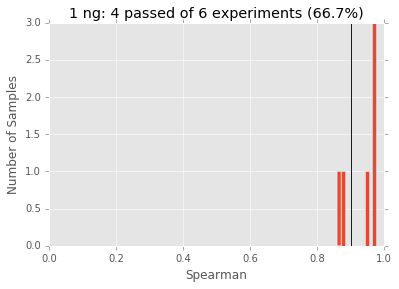

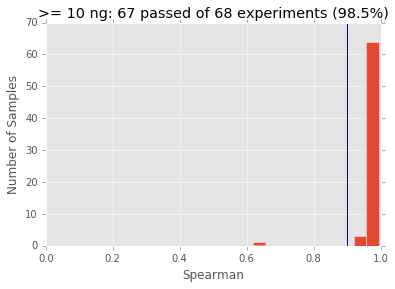

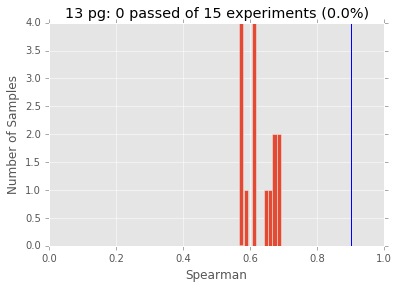

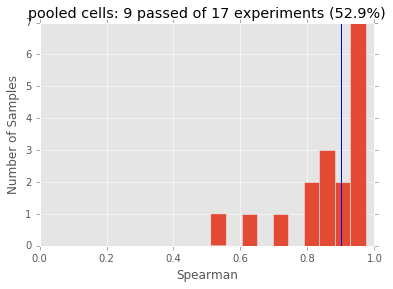

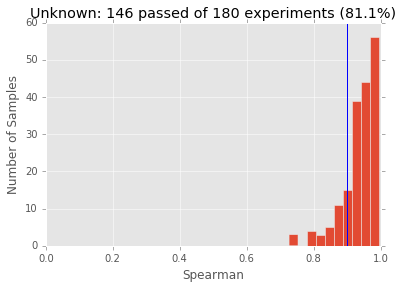

In [11]:
plot_by_starting_amount(starting_amount_scores)

#Experiments Analyzed

<a href="#Index">Top</a> <a href="#Starting-Amount-Histograms">previous</a>

List all of the experiment IDs used.

In [12]:
experiment_df[['lab', 'organism', 'starting', 'Spearman']]

,lab,organism,starting,Spearman
experiment,,,,
ENCSR000AEQ,"Barbara Wold, Caltech",human,100 ng,0.988551
ENCSR000AFX,"Thomas Gingeras, CSHL",human,None,0.961907
ENCSR000CUG,"Thomas Gingeras, CSHL",human,None,0.950683
ENCSR558PXY,"Ross Hardison, PennState",mouse,1 ng,0.881976
ENCSR000AEP,"Barbara Wold, Caltech",human,None,0.977907
ENCSR000AFY,"Thomas Gingeras, CSHL",human,None,0.884303
ENCSR000CUF,"Thomas Gingeras, CSHL",human,None,0.972095
ENCSR347SQR,"Barbara Wold, Caltech",mouse,10 ng,0.994352
ENCSR373BDG,"Thomas Gingeras, CSHL",human,None,0.963947
